In [1]:
from pycoingecko import CoinGeckoAPI
import json
cg = CoinGeckoAPI()

# Call API from CoinGecko to get the list of coin IDS
token_list = cg.get_coins_list()

ids_string_list = []
tmp_string = ""
counter = 0
total_token = len(token_list)

# Build a list of strings that are comma-separated ID of tokens with 250 tokens each and the remaining ones
for token in token_list:
    counter = counter + 1
    current_index = token_list.index(token)
    if counter == 250 or total_token - current_index == 1:
        tmp_string = tmp_string + token['id']
        ids_string_list.append(tmp_string)
        tmp_string = ""
        counter = 0
    else:
        tmp_string = tmp_string + token['id'] + ','

In [2]:
# Call get_coins_markets() API using the string generated earlier and get all the token information
all_token_info = []
for string_ids in ids_string_list:
    new_token_batch = cg.get_coins_markets(vs_currency = 'usd', ids=string_ids, price_change_percentage='1h,24h,7d,30d,1y')
    all_token_info = all_token_info + new_token_batch
len(all_token_info)

11682

In [3]:
# Import pandas
import pandas as pd

In [4]:
# Turn previously generated data into dataframe and show the first five token on that list
df = pd.DataFrame(all_token_info)
df.head()

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,atl,atl_change_percentage,atl_date,roi,last_updated,price_change_percentage_1h_in_currency,price_change_percentage_1y_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_30d_in_currency,price_change_percentage_7d_in_currency
0,1inch,1inch,1inch,https://assets.coingecko.com/coins/images/1346...,2.510000,1.040305e+09,105.0,3.815089e+09,142523961.0,2.560000,...,0.767785,233.28997,2020-12-29T16:38:53.144Z,None,2021-12-14T16:00:04.831Z,-1.323669,NaN,6.981868,-41.387874,-5.858869
1,0x,zrx,0x,https://assets.coingecko.com/coins/images/863/...,0.758416,6.569443e+08,144.0,7.751591e+08,64591786.0,0.780730,...,0.120667,528.52229,2020-03-13T02:27:49.563Z,"{'times': 14.800333625203669, 'currency': 'usd...",2021-12-14T16:00:18.373Z,-1.173146,91.586703,-0.586164,-41.812409,-11.912864
2,3x-long-ethereum-token,ethbull,3X Long Ethereum Token,https://assets.coingecko.com/coins/images/1016...,984.120000,4.228941e+07,682.0,NaN,6130271.0,1037.170000,...,37.320000,2506.93534,2020-03-13T02:20:13.024Z,None,2021-12-14T15:52:31.983Z,1.283285,-7.186915,-1.306139,-63.746108,-38.525215
3,0chain,zcn,0chain,https://assets.coingecko.com/coins/images/4934...,0.455148,2.210204e+07,909.0,NaN,268598.0,0.465351,...,0.000739,60740.80816,2020-05-01T19:24:56.312Z,None,2021-12-14T15:59:47.978Z,1.208310,30.569913,-2.192419,-12.467227,-17.144144
4,1art,1art,ArtWallet,https://assets.coingecko.com/coins/images/1930...,0.145644,1.232209e+07,1147.0,1.458908e+08,654468.0,0.153943,...,0.144183,1.11582,2021-12-14T14:29:06.640Z,None,2021-12-14T15:57:07.415Z,0.397776,NaN,-2.925124,-61.093961,-17.938972


In [5]:
# Sort dataframe using market_cap_rank and show the first 10 rows in ascending order
top_10_market_cap = df.sort_values('market_cap_rank', ascending=True)
top_10_market_cap.head(10)

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,atl,atl_change_percentage,atl_date,roi,last_updated,price_change_percentage_1h_in_currency,price_change_percentage_1y_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_30d_in_currency,price_change_percentage_7d_in_currency
1250,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,46821.000000,8.893994e+11,1.0,9.881784e+11,3.310429e+10,48094.000000,...,67.810000,6.929508e+04,2013-07-06T00:00:00.000Z,None,2021-12-14T16:00:29.804Z,-1.222648,144.483575,-0.602993,-27.588718,-7.213803
3750,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,3787.530000,4.497213e+11,2.0,NaN,2.514549e+10,3881.170000,...,0.432979,8.746612e+05,2015-10-20T00:00:00.000Z,"{'times': 106.56275490138991, 'currency': 'btc...",2021-12-14T15:59:40.084Z,-0.947970,541.601184,-0.286569,-18.835748,-12.882625
1251,binancecoin,bnb,Binance Coin,https://assets.coingecko.com/coins/images/825/...,519.750000,8.800709e+10,3.0,8.800709e+10,1.384853e+09,536.970000,...,0.039818,1.305215e+06,2017-10-19T00:00:00.000Z,None,2021-12-14T15:59:18.840Z,-0.451573,1689.116711,-1.452236,-20.312843,-11.673046
10000,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.997813,7.729077e+10,4.0,NaN,7.118114e+10,1.010000,...,0.572521,7.428406e+01,2015-03-02T00:00:00.000Z,None,2021-12-14T15:57:24.807Z,-0.591214,-0.134624,0.066339,-0.632669,-0.200778
9250,solana,sol,Solana,https://assets.coingecko.com/coins/images/4128...,157.750000,4.907875e+10,5.0,NaN,2.693032e+09,161.030000,...,0.500801,3.203389e+04,2020-05-11T19:35:23.449Z,None,2021-12-14T15:59:51.023Z,-1.775842,9969.629979,0.418703,-34.635240,-18.641238
10500,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,0.996939,4.162291e+10,6.0,NaN,3.929927e+09,1.010000,...,0.891848,1.199899e+01,2021-05-19T13:14:05.611Z,None,2021-12-14T16:00:55.350Z,-0.504973,-0.371272,-0.020967,-0.665841,-0.397910
2000,cardano,ada,Cardano,https://assets.coingecko.com/coins/images/975/...,1.230000,4.000632e+10,7.0,5.614241e+10,1.494685e+09,1.270000,...,0.019253,6.321079e+03,2020-03-13T02:22:55.044Z,None,2021-12-14T16:00:40.744Z,-0.643835,699.282495,-0.034112,-40.257044,-13.257656
8500,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.793069,3.760583e+10,8.0,7.959361e+10,3.250598e+09,0.816740,...,0.002686,2.953049e+04,2014-05-22T00:00:00.000Z,None,2021-12-14T16:00:31.046Z,-1.502510,55.285674,0.097680,-33.561692,-3.774635
7750,polkadot,dot,Polkadot,https://assets.coingecko.com/coins/images/1217...,25.580000,2.784489e+10,9.0,NaN,1.039013e+09,27.080000,...,2.700000,8.696146e+02,2020-08-20T05:48:11.359Z,None,2021-12-14T16:00:25.988Z,-1.647468,423.270062,-3.116314,-45.884343,-9.522293
3250,dogecoin,doge,Dogecoin,https://assets.coingecko.com/coins/images/5/la...,0.189219,2.507556e+10,10.0,NaN,5.098461e+09,0.212374,...,0.000087,2.176336e+05,2015-05-06T00:00:00.000Z,None,2021-12-14T15:58:55.787Z,-1.471190,5698.153499,19.777597,-27.899094,6.135306


In [6]:
# Get the sum of market cap from dataframe
total_market_cap = df['market_cap'].sum()
top_10_token_id = []
top_10_market_percent_dom = []
remaining_percent = 100
for index, row in top_10_market_cap.head(10).iterrows():
    # Make a list of the top 10 token ids
    top_10_token_id.append(row['id'].capitalize())

    # Make a list of the top 10 token market cap dominance by percentage
    market_cap_percent = round((row['market_cap'] / total_market_cap) * 100, 2)
    remaining_percent = round(remaining_percent, 2) - market_cap_percent
    top_10_market_percent_dom.append(market_cap_percent)

# Append Others and its percentage in both top_10_token_id and top_10_market_percent_dom
top_10_token_id.append('Others')
top_10_market_percent_dom.append(remaining_percent)
print(top_10_token_id)
print(top_10_market_percent_dom)

# Include percentage info on top_10_token_id list
top_10_token_with_percentage = [] 
for index in range(11):
    nameholder = top_10_token_id[index] + '(' + str(top_10_market_percent_dom[index]) + '%)'
    top_10_token_with_percentage.append(nameholder)
print(top_10_token_with_percentage)


['Bitcoin', 'Ethereum', 'Binancecoin', 'Tether', 'Solana', 'Usd-coin', 'Cardano', 'Ripple', 'Polkadot', 'Dogecoin', 'Others']
[39.24, 19.84, 3.88, 3.41, 2.17, 1.84, 1.76, 1.66, 1.23, 1.11, 23.86]
['Bitcoin(39.24%)', 'Ethereum(19.84%)', 'Binancecoin(3.88%)', 'Tether(3.41%)', 'Solana(2.17%)', 'Usd-coin(1.84%)', 'Cardano(1.76%)', 'Ripple(1.66%)', 'Polkadot(1.23%)', 'Dogecoin(1.11%)', 'Others(23.86%)']


In [7]:
# Import matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

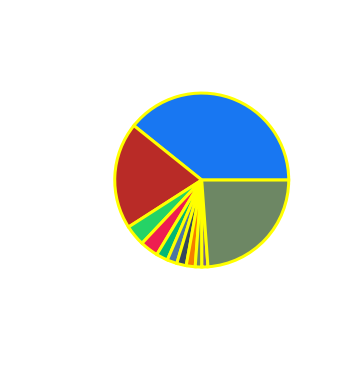

In [8]:
# Build Simple Pie Chart of market cap dominance of the top 10 tokens and the rest
colors = ['#1877F2', '#B92B27', '#25D366', '#EE1D51', '#02B875', '#4C75A3', '#34465D', '#F57D00', '#6D8764', '#76608A', '#6D8764']
y = np.array(top_10_market_percent_dom)
plt.pie(y, labels = top_10_token_with_percentage, rotatelabels=True, labeldistance=1.15, wedgeprops= { 'linewidth' : 3, 'edgecolor' : 'yellow'}, colors=colors, textprops={'color':'w'})
plt.show()

Text(0, 0.5, 'Market Cap Percentage')

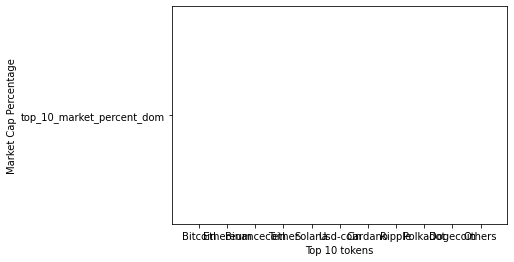

In [9]:
# Build Simple Pie Chart of market cap dominance of the top 10 tokens and the rest
x = ['Bitcoin', 'Ethereum', 'Binancecoin', 'Tether', 'Solana', 'Usd-coin', 'Cardano', 'Ripple', 'Polkadot', 'Dogecoin', 'Others']
y = ['top_10_market_percent_dom']
plt.bar(x,y)
plt.xlabel("Top 10 tokens")
plt.ylabel("Market Cap Percentage")